In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from datetime import date
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import statsmodels.api as sm

In [195]:
bike = pd.read_csv('C:/Users/82104/Desktop/순철/과제/프젝/london_merged.csv')
bike= bike.astype({'cnt': np.float})

bike['timestamp'] = pd.to_datetime(bike['timestamp'], format ="%Y-%m-%d %H:%M:%S")
bike['month'] = 0
bike['day'] = 0
bike['hour'] = 0


for i in range(0,17414) :
    
    if( bike['weather_code'][i] == 1 ) :
        bike['weather_code'][i] = 4

        
    if( bike['weather_code'][i]== 7 ) :
        bike['weather_code'][i] = 5
        
    if( bike['weather_code'][i]== 10 ) :
        bike['weather_code'][i] = 6
        
    if( bike['weather_code'][i]== 26 ) :
        bike['weather_code'][i] = 7
        
    bike['month'][i] = bike['timestamp'][i].month
    bike['day'][i] = bike['timestamp'][i].day
    bike['hour'][i] = bike['timestamp'][i].hour
        
        
    ## if(bike['cnt'][i] != 0) :
    ##    bike['cnt'][i] = math.log(bike['cnt'][i])
        

bike['workday'] = ( bike['is_holiday'] + bike['is_weekend'] == 0 )


del bike['season']
del bike['is_holiday']
del bike['is_weekend']
del bike['timestamp']

C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\82104\anaconda3\envs\machine

In [128]:
bike['t1^2'] = bike['t1']**2
bike['t2^2'] = bike['t2']**2
bike['hum^2'] = bike['hum']**2
bike['wind_speed^2'] = bike['wind_speed']**2
bike['month^2'] = bike['month']**2
bike['day^2'] = bike['day']**2
bike['hour^2'] = bike['hour']**2


In [196]:
bike_T = bike[(bike.workday==True)]
del bike_T['workday']

bike_F = bike[(bike.workday==False)]
del bike_F['workday']

<AxesSubplot:xlabel='hour', ylabel='cnt'>

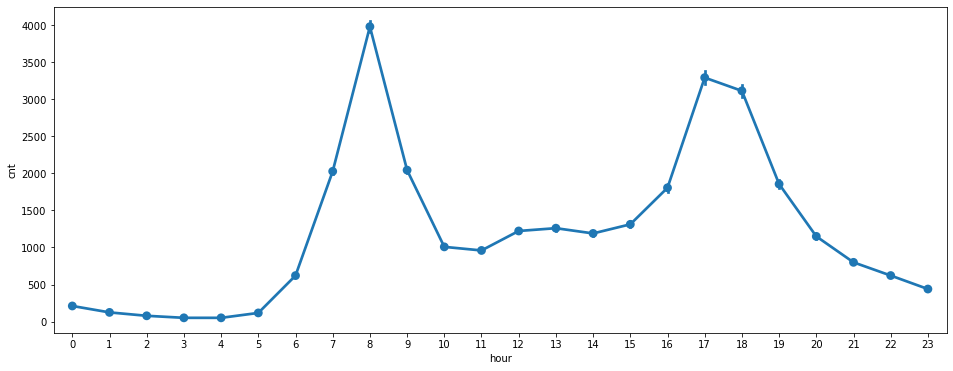

In [197]:
plt.figure(figsize=(16,6))
sns.pointplot(data= bike_T,x=bike_T.hour,y=bike_T.cnt)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

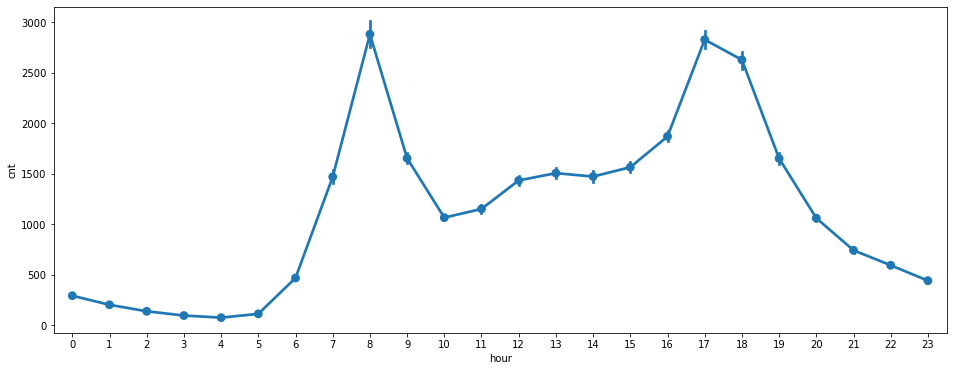

In [198]:
plt.figure(figsize=(16,6))
sns.pointplot(data= bike,x=bike.hour,y=bike.cnt)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

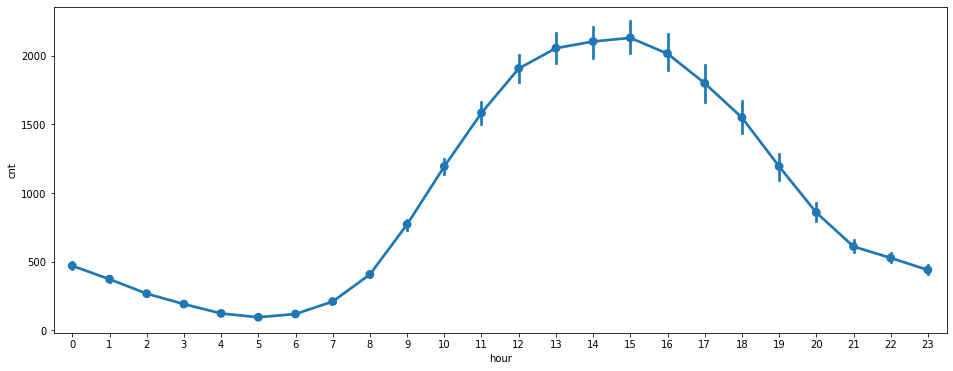

In [199]:
plt.figure(figsize=(16,6))
sns.pointplot(data= bike_F,x=bike_F.hour,y=bike_F.cnt)

<AxesSubplot:xlabel='t2', ylabel='cnt'>

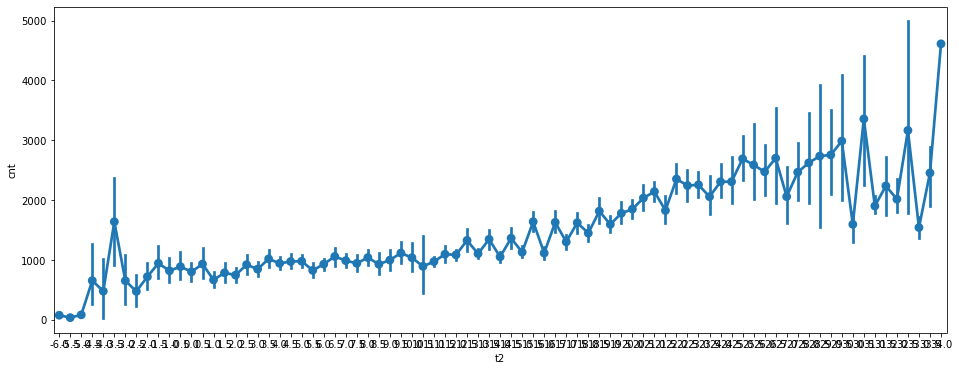

In [192]:
plt.figure(figsize=(16,6))
sns.pointplot(data= bike_T,x=bike_T.t2,y=bike_T.cnt)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

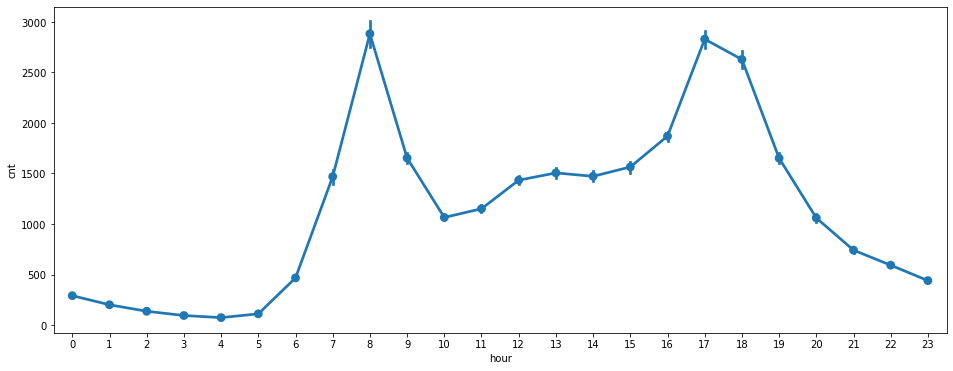

In [169]:
plt.figure(figsize=(16,6))
sns.pointplot(data= bike,x=bike.hour,y=bike.cnt)

<AxesSubplot:xlabel='weather_code', ylabel='cnt'>

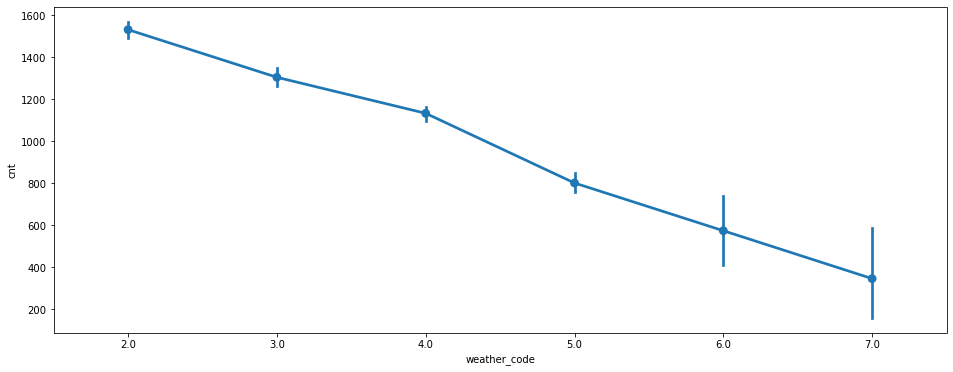

In [200]:
plt.figure(figsize=(16,6))
sns.pointplot(data= bike_T,x=bike_T.weather_code,y=bike_T.cnt)

<AxesSubplot:xlabel='weather_code', ylabel='cnt'>

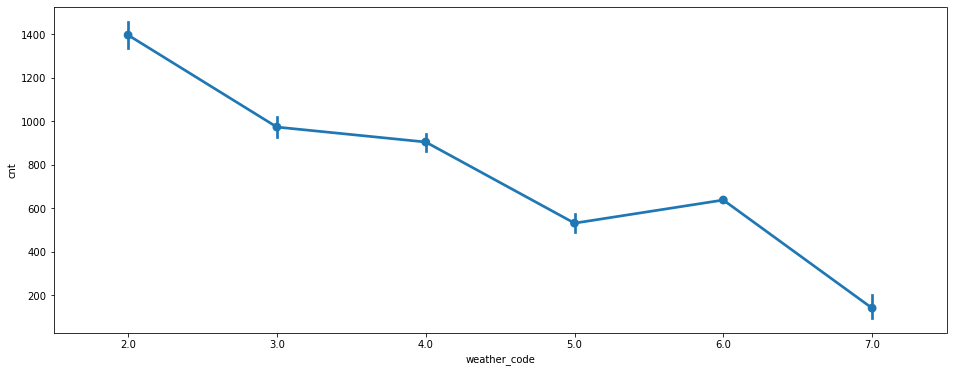

In [201]:
plt.figure(figsize=(16,6))
sns.pointplot(data= bike_F,x=bike_F.weather_code,y=bike_F.cnt)

<AxesSubplot:xlabel='month', ylabel='cnt'>

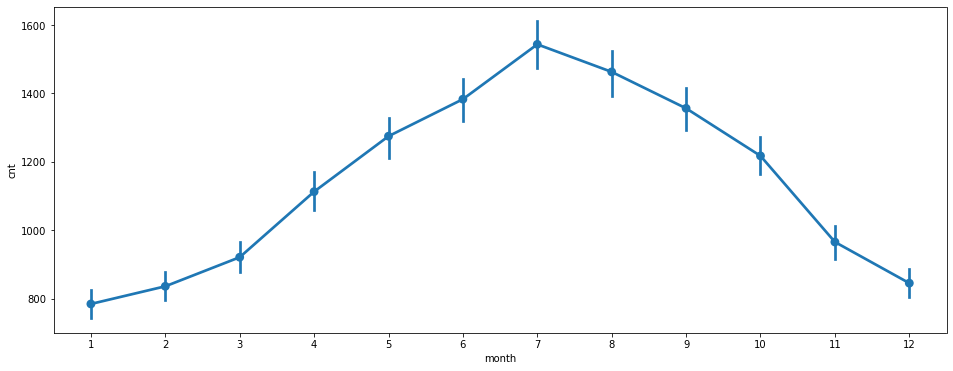

In [194]:
plt.figure(figsize=(16,6))
sns.pointplot(data= bike,x=bike.month,y=bike.cnt)

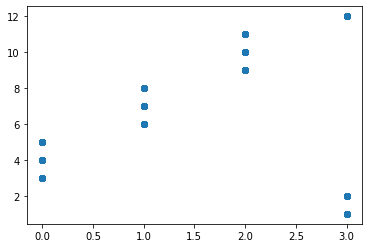

In [191]:
plt.scatter(bike.season, bike.month)

In [208]:
bike_T['month^2'] = bike_T['month']**2
bike_T['hour^2'] = bike_T['hour']**2
bike_T['hour^3'] = bike_T['hour']**3
bike_T['hour^4'] = bike_T['hour']**4
bike_T['hour^5'] = bike_T['hour']**5


bike_F['month^2'] = bike_F['month']**2
bike_F['hour^2'] = bike_F['hour']**2
bike_F['hour^3'] = bike_F['hour']**3


C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [379]:
bike_T

,cnt,t1,t2,hum,wind_speed,weather_code,month,day,hour,month^2,hour^2,hour^3,hour^4,hour^5
24,83.0,4.0,3.0,93.0,6.0,4.0,1,5,0,1,0,0,0,0
25,67.0,4.0,3.5,93.0,5.0,4.0,1,5,1,1,1,1,1,1
26,32.0,5.0,4.0,87.0,6.0,4.0,1,5,2,1,4,8,16,32
27,22.0,6.0,4.5,84.0,7.5,4.0,1,5,3,1,9,27,81,243
28,38.0,6.5,5.0,84.0,8.0,4.0,1,5,4,1,16,64,256,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042.0,5.0,1.0,81.0,19.0,3.0,1,3,19,1,361,6859,130321,2476099
17410,541.0,5.0,1.0,81.0,21.0,4.0,1,3,20,1,400,8000,160000,3200000
17411,337.0,5.5,1.5,78.5,24.0,4.0,1,3,21,1,441,9261,194481,4084101
17412,224.0,5.5,1.5,76.0,23.0,4.0,1,3,22,1,484,10648,234256,5153632


In [380]:
bike_F

,cnt,t1,t2,hum,wind_speed,weather_code,month,day,hour,month^2,hour^2,hour^3
0,182.0,3.0,2.0,93.0,6.0,3.0,1,4,0,1,0,0
1,138.0,3.0,2.5,93.0,5.0,4.0,1,4,1,1,1,1
2,134.0,2.5,2.5,96.5,0.0,4.0,1,4,2,1,4,8
3,72.0,2.0,2.0,100.0,0.0,4.0,1,4,3,1,9,27
4,47.0,2.0,0.0,93.0,6.5,4.0,1,4,4,1,16,64
...,...,...,...,...,...,...,...,...,...,...,...,...
17385,433.0,3.0,0.0,81.0,11.0,4.0,1,2,19,1,361,6859
17386,334.0,3.0,0.0,75.0,13.0,4.0,1,2,20,1,400,8000
17387,233.0,2.5,-0.5,78.0,11.0,4.0,1,2,21,1,441,9261
17388,201.0,2.0,-1.0,81.0,10.0,4.0,1,2,22,1,484,10648


In [378]:
bike_T_X = bike_T.drop('cnt', axis=1)
bike_T_y = bike_T['cnt']

bike_F_X = bike_F.drop('cnt', axis=1)
bike_F_y = bike_F['cnt']


In [203]:
def stepwise_selection(data,target,cutoff):
    initial_features = data.columns.tolist()
    best_features = []
    while(len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < cutoff):
            best_features.append(new_pval.idxmin())
            while(len(best_features) > 0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= cutoff):
                    excluded_feature=p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

In [384]:
stepdata = stepwise_selection(bike_T_X, bike_T_y, 0.05)
stepdata

C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['hum',
 'hour',
 'hour^2',
 't1',
 'hour^5',
 'hour^4',
 'hour^3',
 'wind_speed',
 'weather_code',
 't2',
 'day',
 'month',
 'month^2']

In [385]:
stepdata = stepwise_selection(bike_F_X, bike_F_y, 0.05)
stepdata

C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['hum',
 't1',
 'hour',
 'hour^3',
 'hour^2',
 'wind_speed',
 'weather_code',
 't2',
 'day',
 'month^2',
 'month']

In [722]:
bike_T_X.shape, bike_F_X.shape

((12060, 18), (5354, 15))

In [214]:
bike_T_Xtrain, bike_T_Xtest, bike_T_ytrain, bike_T_ytest = train_test_split(bike_T_X, bike_T_y, test_size=0.2, random_state=2020)
bike_F_Xtrain, bike_F_Xtest, bike_F_ytrain, bike_F_ytest = train_test_split(bike_F_X, bike_F_y, test_size=0.2, random_state=2020)

0.44075312569886804


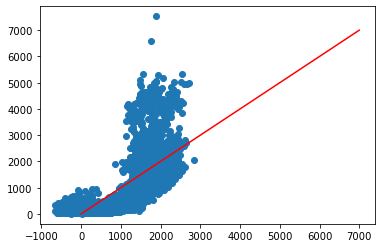

In [270]:
reg = LinearRegression()
Model = reg.fit(bike_T_Xtrain, bike_T_ytrain)
plt.scatter(Model.predict(bike_T_Xtest), bike_T_ytest)
plt.plot((0,7000),(0,7000), 'r-')
print(Model.score(bike_T_Xtest, bike_T_ytest))

In [395]:
stepdata = stepwise_selection(bike_T_X, np.log1p(bike_T_y), 0.01)
stepdata

C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['hour',
 'hum',
 'hour^2',
 't2',
 'hour^3',
 'hour^4',
 'hour^5',
 'weather_code',
 'wind_speed',
 'month',
 'month^2']

In [396]:
bike_T_X = bike_T.drop('cnt', axis=1)
bike_T_X = bike_T_X.drop('day', axis=1)
bike_T_X = bike_T_X.drop('t2', axis=1)

In [398]:
bike_T_Xtrain, bike_T_Xtest, bike_T_ytrain, bike_T_ytest = train_test_split(bike_T_X, bike_T_y, test_size=0.2, random_state=2020)

0.7923858125926345


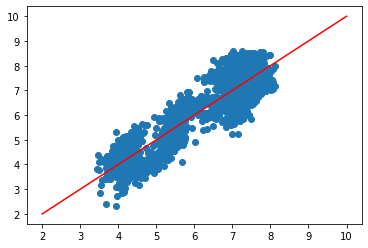

In [393]:
reg = LinearRegression()
Model = reg.fit(bike_T_Xtrain, np.log1p(bike_T_ytrain))
plt.scatter(Model.predict(bike_T_Xtest), np.log1p(bike_T_ytest))
plt.plot((2,10),(2,10), 'r-')
print( Model.score( bike_T_Xtest , np.log1p(bike_T_ytest) ) )

In [394]:
Model.coef_, Model.intercept_

(array([ 2.13322542e-02, -6.64694501e-03, -9.98587678e-03, -8.09470480e-02,
         1.02322067e-01, -1.61633697e+00, -6.82916089e-03,  5.79615026e-01,
        -6.49800453e-02,  3.02430733e-03, -5.05052854e-05]),
 5.816938202459334)

0.7987316627928431


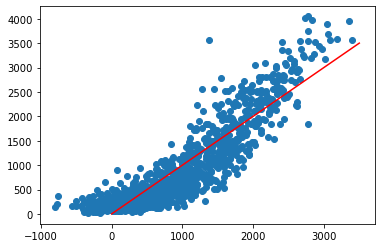

In [390]:
reg = LinearRegression()
Model = reg.fit(bike_F_Xtrain, bike_F_ytrain)
plt.scatter(Model.predict(bike_F_Xtest), bike_F_ytest)
plt.plot((0,3500),(0,3500), 'r-')
print(Model.score(bike_F_Xtest, bike_F_ytest))

In [391]:
stepdata = stepwise_selection(bike_F_X, np.log1p( bike_F_y ), 0.01)
stepdata

C:\Users\82104\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['hum',
 'hour',
 'hour^3',
 'hour^2',
 't2',
 'weather_code',
 'wind_speed',
 'month',
 'month^2']

In [420]:
bike_F_X = bike_F.drop('cnt', axis=1)
bike_F_X = bike_F_X.drop('day', axis=1)
bike_F_X = bike_F_X.drop('t1', axis=1)

bike_F_Xtrain, bike_F_Xtest, bike_F_ytrain, bike_F_ytest = train_test_split(bike_F_X, bike_F_y, test_size=0.2, random_state=2020)

0.8061829868828161


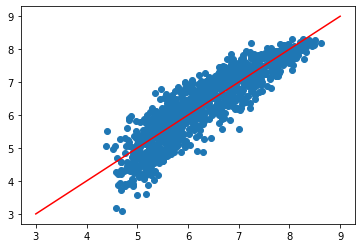

In [421]:
reg = LinearRegression()
Model = reg.fit(bike_F_Xtrain, np.log1p( bike_F_ytrain ) )
plt.scatter(Model.predict(bike_F_Xtest), np.log1p(bike_F_ytest))
plt.plot((3,9),(3,9), 'r-')
print(Model.score(bike_F_Xtest, np.log1p( bike_F_ytest) ) )

In [422]:
Model.coef_, Model.intercept_

(array([ 0.0358338 , -0.01760261, -0.01328897, -0.11434721,  0.06084532,
        -0.31541509, -0.00367618,  0.05412485, -0.00179452]),
 7.225438611127432)